# Basic starting

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [6]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

# Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

When a method or function has an inplace parameter set to True, it means that the operation will modify the original object directly, without creating a new object. This can be useful when you want to modify the object in place without assigning the result to a new variable.

In [10]:
df.sample(5)

,v1,v2
1621,ham,Living is very simple.. Loving is also simple....
3659,ham,I will reach ur home in &lt;#&gt; minutes
1283,ham,Yes i thought so. Thanks.
3321,ham,Ok darlin i supose it was ok i just worry too ...
4714,ham,S:)8 min to go for lunch:)


In [11]:
#renaming two columns

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [12]:
df.sample(5)

,target,text
2179,ham,And popping &lt;#&gt; ibuprofens was no help.
1189,ham,In that case I guess I'll see you at campus lodge
5289,ham,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
210,ham,"What's up bruv, hope you had a great break. Do..."
2030,ham,"Ugh y can't u just apologize, admit u were wro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [14]:
##converting ham to 0, spam to 1

df['target']= encoder.fit_transform(df['target']) 

In [15]:
df.sample(5)

,target,text
3350,0,At what time are you coming.
2186,0,So is there anything specific I should be doin...
3880,0,Can you plz tell me the ans. BSLVYL sent via f...
1656,0,Yes I posted a couple of pics on fb. There's s...
3618,1,8007 25p 4 Alfie Moon's Children in Need song ...


In [16]:
##no missing values

df.isnull().sum() 

target    0
text      0
dtype: int64

In [17]:
##checking duplicates

df.duplicated().sum()

403

In [18]:
df= df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

The drop_duplicates method in pandas to remove duplicate rows from the DataFrame df and keeping only the first occurrence of each unique row.

In [20]:
df.shape

(5169, 2)

# EDA

In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ce61d622b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

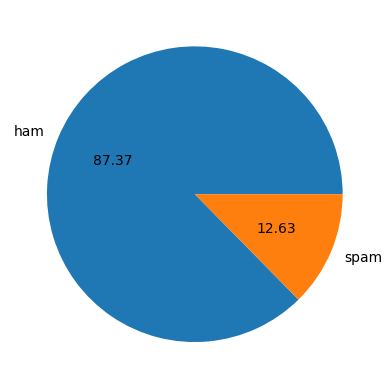

In [22]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rajit-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_chars']= df['text'].apply(len)

In [26]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df['num_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
##for ham messages

df[df['target'] == 1][['num_chars','num_words','num_sents']].dropna().describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
##for spam messages

df[df['target'] == 1][['num_chars','num_words','num_sents']].dropna().describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

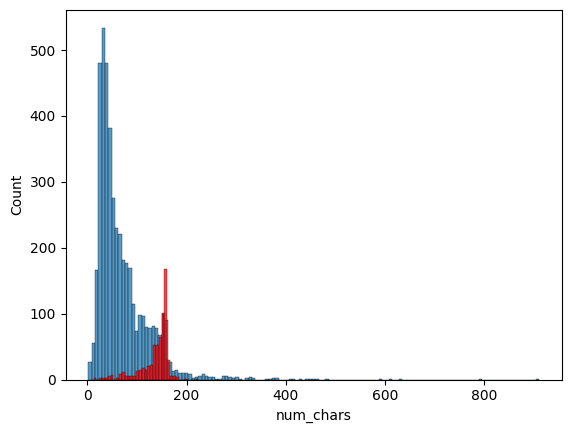

In [33]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

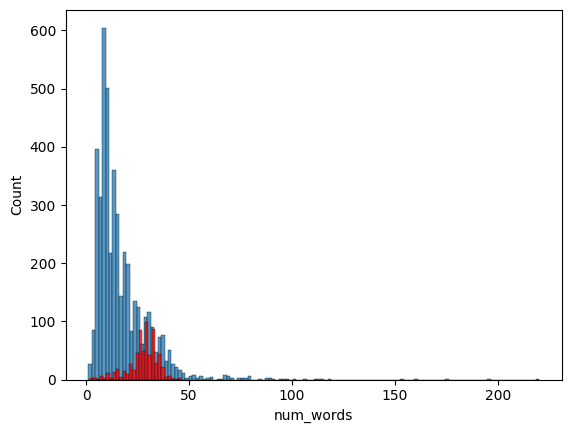

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

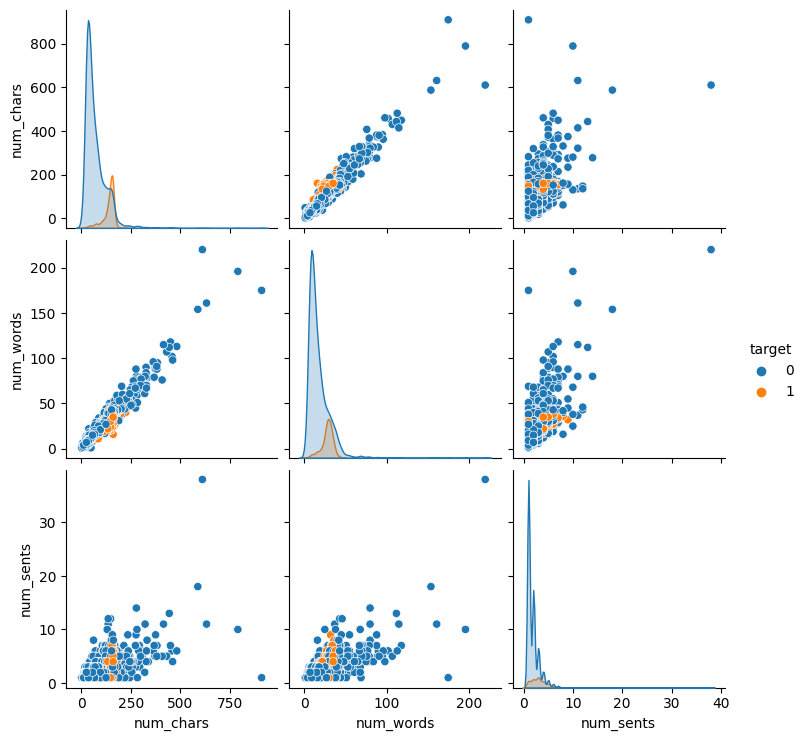

In [35]:
sns.pairplot(df,hue='target')

In [36]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Data preprocessing

In [37]:
from nltk.corpus import stopwords
import string

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rajit-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
def transform_text (text) :
    text=text.lower() ##converting into lower case
    text= nltk.word_tokenize(text) ##tokenizing
    
    y=[]
    
    for i in text:
        if i.isalnum(): ##removing special characters
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  ##removing stopwords
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [40]:
transform_text('Did you like my presentation')

NameError: name 'ps' is not defined

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("Singing")

'sing'

In [60]:
df['trans_text']=df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_chars,num_words,num_sents,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [50]:
spam_wc=wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

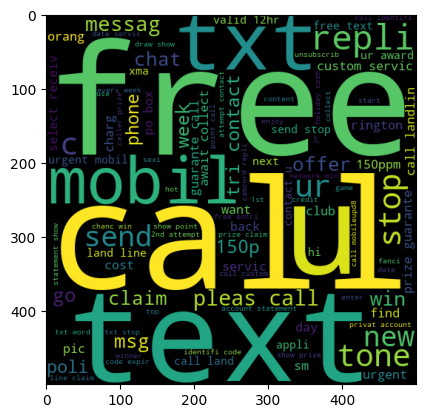

In [51]:
plt.imshow(spam_wc)

In [52]:
ham_wc=wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

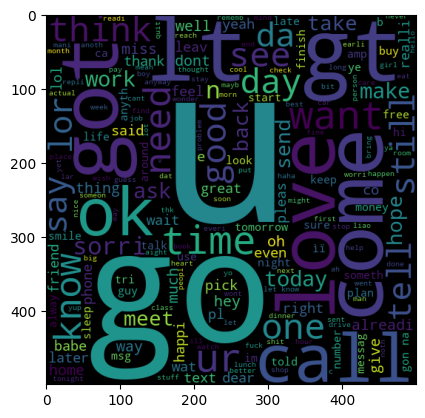

In [53]:
plt.imshow(ham_wc)

In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer()

you are using the fit_transform() method from a CountVectorizer object (cv) to transform text data in the 'trans_text' column of a DataFrame (df) into a numeric representation using a bag-of-words approach. The resulting transformed data is then converted to a dense array using the toarray() method.

In [76]:
x = tfidf.fit_transform(df['trans_text']).toarray()

In [62]:
x.shape

(5169, 6708)

In [63]:
y= df['target'].values

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [77]:
gnb.fit(x_train, y_train)
y_pred1= gnb.predict(x_test)

In [78]:
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [79]:
mnb.fit(x_train, y_train)
y_pred1= mnb.predict(x_test)

In [80]:
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [81]:
bnb.fit(x_train, y_train)
y_pred1= bnb.predict(x_test)

In [82]:
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc
}

In [88]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

(0.9642166344294004, 0.8344370860927153)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
4,LR,0.970986,0.973684
3,DT,0.926499,0.942857
2,NB,0.964217,0.834437
0,SVC,0.926499,0.742188
